In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches

In [2]:
def wise(v):
    if v == 1:
        return "CCW"
    else:
        return "CW"

In [3]:
def make_circle(r):
    t = np.arange(0, np.pi * 2.0, 0.01)
    t = t.reshape((len(t), 1))
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.hstack((x, y))

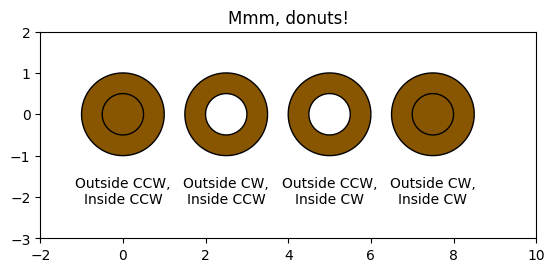

In [4]:
Path = mpath.Path

fig, ax = plt.subplots()
inside_vertices = make_circle(0.5)
outside_vertices = make_circle(1.0)

codes = np.ones(len(inside_vertices), dtype=mpath.Path.code_type) * mpath.Path.LINETO
codes[0] = mpath.Path.MOVETO

for i, (inside, outside) in enumerate(((1, 1), (1, -1), (-1, 1), (-1, -1))):
    vertices = np.concatenate((outside_vertices[::outside], inside_vertices[::inside]))
    vertices[:, 0] += i * 2.5
    all_codes = np.concatenate((codes, codes))
    path = mpath.Path(vertices, all_codes)
    patch = mpatches.PathPatch(path, facecolor="#885500", edgecolor="black")
    ax.add_patch(patch)
    ax.annotate(
        f"Outside {wise(outside)},\nInside {wise(inside)}",
        (i * 2.5, -1.5), ha="center", va="top",
    )

ax.set_xlim(-2, 10)
ax.set_ylim(-3, 2)
ax.set_title("Mmm, donuts!")
ax.set_aspect(1.0)

plt.show()